# Problem Set 2

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on bCourses). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of surveys conducted in 1998
 * "Wave 2" of surveys conducted in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from bCourses. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|schooling in 1997|
|grc97  |grade enrolled in 1997

In [1]:
import csv
import pandas
import matplotlib.pyplot as plt  
import statsmodels.formula.api as smf
from scipy.stats import ttest_ind

In [2]:
# examining the dataset and reassigning select variables to be binary
data = pandas.read_csv("progresa_sample.csv")
data['progresa'].replace({'basal': 1, '0': 0}, inplace=True)
data['poor'].replace({'pobre': 1, 'no pobre': 0}, inplace=True)
print(data.isnull().sum())
print(data.shape)
display(data.head())
display(data.tail())
data.dtypes

year                0
sex                24
indig             300
dist_sec            0
sc               8453
grc              6549
fam_n               0
min_dist            0
dist_cap            0
poor                0
progresa            0
hohedu              0
hohwag              0
welfare_index     210
hohsex             20
hohage             10
age                 0
village             0
folnum              0
grc97               0
sc97             3872
dtype: int64
(77250, 21)


,year,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,poor,...,hohedu,hohwag,welfare_index,hohsex,hohage,age,village,folnum,grc97,sc97
0,97,0.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,1,...,6,0.0,583.0,1.0,35.0,13,163,1,7,1.0
1,98,0.0,0.0,4.473,1.0,8.0,7,21.168384,21.168384,1,...,6,0.0,583.0,1.0,35.0,14,163,1,7,1.0
2,97,1.0,0.0,4.473,1.0,6.0,7,21.168384,21.168384,1,...,6,0.0,583.0,1.0,35.0,12,163,2,6,1.0
3,98,1.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,1,...,6,0.0,583.0,1.0,35.0,13,163,2,6,1.0
4,97,0.0,0.0,4.473,1.0,2.0,7,21.168384,21.168384,1,...,6,0.0,583.0,1.0,35.0,8,163,3,2,1.0


,year,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,poor,...,hohedu,hohwag,welfare_index,hohsex,hohage,age,village,folnum,grc97,sc97
77245,98,0.0,1.0,3.148,1.0,4.0,6,137.473203,172.770829,1,...,0,0.0,599.0,0.0,67.0,12,348,38623,2,1.0
77246,97,1.0,1.0,3.148,1.0,1.0,6,137.473203,172.770829,1,...,0,0.0,599.0,0.0,67.0,7,348,38624,1,1.0
77247,98,1.0,1.0,3.148,1.0,2.0,6,137.473203,172.770829,1,...,0,0.0,599.0,0.0,67.0,8,348,38624,1,1.0
77248,97,0.0,1.0,3.148,0.0,2.0,3,137.473203,172.770829,1,...,0,375.0,634.0,1.0,38.0,14,348,38625,2,0.0
77249,98,0.0,1.0,3.148,0.0,3.0,3,137.473203,172.770829,1,...,0,375.0,634.0,1.0,38.0,15,348,38625,2,0.0


year               int64
sex              float64
indig            float64
dist_sec         float64
sc               float64
grc              float64
fam_n              int64
min_dist         float64
dist_cap         float64
poor               int64
progresa           int64
hohedu             int64
hohwag           float64
welfare_index    float64
hohsex           float64
hohage           float64
age                int64
village            int64
folnum             int64
grc97              int64
sc97             float64
dtype: object

---

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean, median and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

*Note:* For this and subsequent problems, you will need to be careful in how you deal with missing (NULL) values. You should not blindly drop rows and columns where any data field is missing.  For instance, in calculating the average `hohwag`, you should average the `hohwag` values from all households that report a value (even if the household does not have a recorded `age` value, for example). 

In [3]:
# alphabetizes columns
data = data.sort_index(axis=1)
# drops selected columns
df = data.loc[:, ~data.columns.isin(['year', 'folnum', 'village'])]
# creates summary statistics
ss = df.describe(percentiles = [.5]).T
# drops selected columns
ss = ss.loc[:, ~ss.columns.isin(['count', 'min', 'max'])]
print(ss)

                     mean         std         50%
age             11.366460    3.167744   11.000000
dist_cap       147.674452   76.063134  132.001494
dist_sec         2.418910    2.234109    2.279000
fam_n            7.215715    2.352900    7.000000
grc              3.963537    2.499063    4.000000
grc97            3.705372    2.572387    4.000000
hohage          44.436717   11.620372   43.000000
hohedu           2.768104    2.656106    2.000000
hohsex           0.925185    0.263095    1.000000
hohwag         586.985312  788.133664  500.000000
indig            0.298324    0.457525    0.000000
min_dist       103.447520   42.089441  111.228612
poor             0.846498    0.360473    1.000000
progresa         0.615663    0.486441    1.000000
sc               0.819818    0.384342    1.000000
sc97             0.813922    0.389172    1.000000
sex              0.512211    0.499854    1.000000
welfare_index  690.346564  139.491130  685.000000


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages?  Present your results in a single table with the following columns and 14 (or so) rows (alphabetized by variable name):


| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|age|10.716991|10.742023|-0.025032|4.785594e-01|
|dist_cap|150.829074|153.769730|-2.940656|8.415005e-04|
|dist_sec|2.453122|2.507662|-0.054540|3.569843e-02|
|fam_n|7.281327|7.302469|-0.021142|4.271039e-01|
|grc|3.531599|3.543050|-0.011450|6.890151e-01|
|grc97|3.531599|3.543050|-0.011450|6.890151e-01|
|hohage|43.648828|44.276918|-0.628090|1.796243e-06|  
|hohedu|2.663139|2.590348|0.072791|1.105093e-02|
|hohsex|0.924656|0.922947|0.001709|5.711858e-01|
|hohwag|544.339544|573.163558|-28.824015|3.253835e-04|  
|indig|0.325986|0.332207|-0.006222|2.453603e-01|
|min_dist|107.152915|103.237854|3.915060|2.358312e-16|  
|sc|0.822697|0.815186|0.007511|9.517806e-02|
|sc97|0.822697|0.815186|0.007511|9.517806e-02| 
|sex|0.519317|0.505052|0.014265|1.219172e-02|
|welfare_index|655.428377|659.579100|-4.150723|1.431016e-03|


 *Hint:* Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 from poor households (i.e., poor=='pobre').



In [4]:
# dropping columns we do not need for this analysis
df1 = data.drop(["folnum", "poor", "progresa", "village", "year"],axis=1)

# calculating the treatment averages
means_treatment = []
for col in df1:
    means_treatment.append(data[(data['progresa']==1) & (data['poor']==1) & (data['year']==97)][col].mean())

# calculating the control averages
means_control = []
for col in df1:
    means_control.append(data[(data['progresa']==0) & (data['poor']==1) & (data['year']==97)][col].mean())

# function runs a ttest between the treatment and control groups of different columns and returns the pvalue
def test(name):
    val1 = data[(data['progresa']==1) & (data['poor']==1) & (data['year']==97)]
    val2 = data[(data['progresa']==0) & (data['poor']==1) & (data['year']==97)]
    
    result = ttest_ind(val1[name].dropna(), val2[name].dropna())
    return result.pvalue

# code to run the various t tests
results = []
for col in df1:
    results.append(test(col))

# creates a new dataframe with all the info calculated above
new_df = pandas.DataFrame({'Variable Name' : df1.columns, 'Average Value (Treatment)' : means_treatment, 'Average Value (Control)' : means_control})    
new_df['Difference (Treat - Control)'] = new_df['Average Value (Treatment)'] - new_df['Average Value (Control)']
new_df['p-value'] = results

print(new_df)


    Variable Name  Average Value (Treatment)  Average Value (Control)  \
0             age                  10.716991                10.742023   
1        dist_cap                 150.829074               153.769730   
2        dist_sec                   2.453122                 2.507662   
3           fam_n                   7.281327                 7.302469   
4             grc                   3.531599                 3.543050   
5           grc97                   3.531599                 3.543050   
6          hohage                  43.648828                44.276918   
7          hohedu                   2.663139                 2.590348   
8          hohsex                   0.924656                 0.922947   
9          hohwag                 544.339544               573.163558   
10          indig                   0.325986                 0.332207   
11       min_dist                 107.152915               103.237854   
12             sc                   0.822697       

### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages at baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

A: dist_cap, dist_sec, hohage, hohedu, hohwag, min_dist, sex, welfare_index all have statistically significant differences between treatment and control villages at baseline

B: Differences at baseline are important because they indicate that the variables with significant differences might influence the outcome. This implies that the randomization was imperfect. It is important to know which variables are significant so we can control for their effect. 

C: Since there are significant baseline differences, a differenc-in-difference method will be useful to measure the impact of the treatment.

### 1.4 Graphical exploration, part 1

Visualize the distribution of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households). Does there appear to be a difference? Is this difference statistically significant?

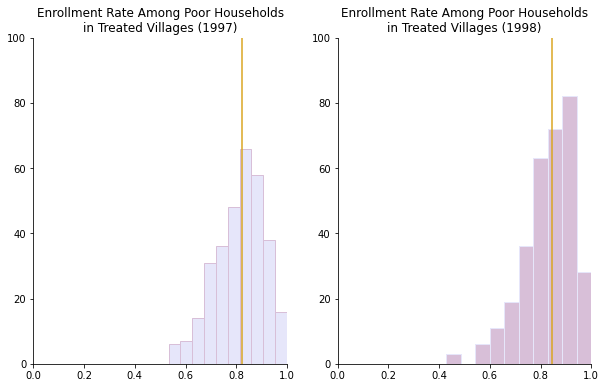

In [5]:
# new dataframe for poor households in treated villages in 1997
df2 = data[(data['progresa']==1) & (data['poor']==1) & (data['year']==97)]
df2 = df2.groupby('village').mean() # takes the average values so that 'sc' is a rate
before = df2['sc']

# new dataframe for poor households in treated villages in 1998
df3 = data[(data['progresa']==1) & (data['poor']==1) & (data['year']==98)]
df3 = df3.groupby('village').mean()
after = df3['sc']

# calculates the overall averages for the respective groups
overall_avg1 = data[(data['progresa']==1) & (data['poor']==1) & (data['year']==97)]['sc'].mean()
overall_avg2 = data[(data['progresa']==1) & (data['poor']==1) & (data['year']==98)]['sc'].mean()

# creating the graphs
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].hist(before, edgecolor= 'thistle', color='lavender')
ax[0].set_title("Enrollment Rate Among Poor Households\nin Treated Villages (1997)")
ax[0].set_xlim([0,1])
ax[0].set_ylim([0,100])
ax[0].axvline(x=overall_avg1, color = "goldenrod")
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[1].hist(after, edgecolor = 'lavender', color='thistle')
ax[1].set_title("Enrollment Rate Among Poor Households\nin Treated Villages (1998)")
ax[1].set_xlim([0,1])
ax[1].set_ylim([0,100])
ax[1].axvline(x=overall_avg2, color = "goldenrod")
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
plt.show()

In [6]:
# displays averages and the ttest results between the groups
print("Treatment Group 1997 Average: " + str(overall_avg1))
print("Treatment Group 1998 Average: " + str(overall_avg2))
result = ttest_ind(df2['sc'].dropna(), df3['sc'].dropna())
print(result)

Treatment Group 1997 Average: 0.8226968874033842
Treatment Group 1998 Average: 0.8464791213954308
Ttest_indResult(statistic=-2.015713486515638, pvalue=0.04424870036572115)


There does appear to be a difference between the distributions of the enrollment rates in the treatment villages before treatment and after treatment. The 1997 graph appears to be more normally distributed than the more left skewed distribution of the 1998 graph. This difference in distribution suggests that the treatment did have an effect on enrollment rates. We can also see that the average enrollment rate across the two years moved slightly higher after the treatment, further supporting the effect of the treatment. A histogram alone is not enough information to determine statistical significance. After performing a ttest to compare the means between the two groups, we see that our p-value is less than .05, so there is a statistical significance between the difference in means of the two groups.

### 1.5 Graphical exploration, part 2

Repeat the above exercise for poor households in **control villages**, before and after treatment. Do you observe a difference in enrollment in control villages between 1997 and 1998? How does what you observe here affect how you might approach measuring the impact of PROGRESA?

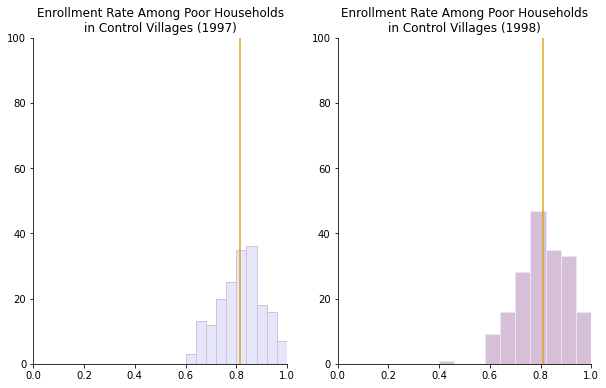

In [7]:
# new dataframe for poor households in control villages in 1997
df4 = data[(data['progresa']==0) & (data['poor']==1) & (data['year']==97)]
df4 = df4.groupby('village').mean()
before_c = df4['sc']

# new dataframe for poor households in conrol villages in 1998
df5 = data[(data['progresa']==0) & (data['poor']==1) & (data['year']==98)]
df5 = df5.groupby('village').mean()
after_c = df5['sc']

# calculates the overall averages for the respective groups
overall_avg3 = data[(data['progresa']==0) & (data['poor']==1) & (data['year']==97)]['sc'].mean()
overall_avg4 = data[(data['progresa']==0) & (data['poor']==1) & (data['year']==98)]['sc'].mean()


# creating the graphs
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].hist(before_c, edgecolor= 'thistle', color='lavender')
ax[0].set_title('Enrollment Rate Among Poor Households\nin Control Villages (1997)')
ax[0].set_xlim([0,1])
ax[0].set_ylim([0,100])
ax[0].axvline(x=overall_avg3, color = 'goldenrod')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)


ax[1].hist(after_c, edgecolor = 'lavender', color='thistle')
ax[1].set_title('Enrollment Rate Among Poor Households\nin Control Villages (1998)')
ax[1].set_xlim([0,1])
ax[1].set_ylim([0,100])
ax[1].axvline(x=overall_avg4, color = 'goldenrod')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
plt.show()

In [8]:
# displays averages and the ttest results between the groups
print("Control Group 1997 Average: " + str(overall_avg3))
print("Control Group 1998 Average: " + str(overall_avg4))
result = ttest_ind(df4['sc'].dropna(), df5['sc'].dropna())
print(result)

Control Group 1997 Average: 0.8151860030575845
Control Group 1998 Average: 0.807636956730308
Ttest_indResult(statistic=0.7816669784862521, pvalue=0.4349129201749543)


Overall, there does not appear to be a difference between the distributions of the enrollment rates in the control villages before treatment and after treatment. Both graphs appear to be approximately normally distributed. This implies that the there was no significant change in enrollment rates for the control group between 1997 and 1998. We can also see that the average enrollment rate across the two years moved slightly lower in 1998. A histogram is not enough information to determine statistical significance. After running a ttest between the groups, we can see that our p-value is not below .05, so our result is not statistically significant and we cannot reject our null that the differences in means for the control group between the two years is the same.
Because the differences in means between the two years for the control group is not statistically significant, it seems like a simple regression would suffice to measure the impact of PROGRESA as time did not seem to make a significant difference in the control group. However, considering the baseline differences, it does make sense to proceed with DiD to measure the impact of PROGRESA.

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on the social and economic outcomes of individuals in Mexico. We will focus on the impact of the program on school enrollment rates among the poor (those with poor=='pobre'), since only the poor were eligible to receive PROGRESA assistance, and since a primary objective of the program was to increase school enrollment.

### 2.1 Simple differences: T-test

Begin by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment), calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages. Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [9]:
from scipy import stats

In [10]:
# average enrollment rate among poor households in the Treatment households in 1998
avg_enroll_treat = data[(data['progresa']==1) & (data['poor']==1) & (data['year']==98)]['sc']

# average enrollment rate among poor households in the Control households in 1998
avg_enroll_control = data[(data['progresa']==0) & (data['poor']==1) & (data['year']==98)]['sc']

# Levene's test to check for equal variances
m = stats.levene(avg_enroll_treat.dropna(), avg_enroll_control.dropna())
print(m)

# ttest estimate
print('Average Enrollment Rate Among Poor Households in the Treatment Villages: ' + str(avg_enroll_treat.mean()))
print('Average Enrollment Rate Among Poor Households in the Control Villages: ' + str(avg_enroll_control.mean()))
print('Difference: ' + str(avg_enroll_treat.mean()-avg_enroll_control.mean()))

# ttest
t = ttest_ind(avg_enroll_treat.dropna(), avg_enroll_control.dropna(), equal_var = False)
print(t)

LeveneResult(statistic=69.86820952418303, pvalue=6.636344447378102e-17)
Average Enrollment Rate Among Poor Households in the Treatment Villages: 0.8464791213954308
Average Enrollment Rate Among Poor Households in the Control Villages: 0.807636956730308
Difference: 0.0388421646651228
Ttest_indResult(statistic=8.181477157107308, pvalue=2.9655072988948406e-16)


Before running our ttest, I ran Levene's test for equality of variance. Since our p-value is below .05 (6.63e-17), we can reject our null hypothesis that our groups have equal variances.

**T-Test**

**Null hypothesis:** The average enrollment rate among poor households that are in the treatment group in 1998 is the same as the average enrollment rate among poor households that are in the control group in 1998. <br>

**Alternative hypothesis:** The average enrollment rate among poor households that are in the treatment group in 1998 is different than the average enrollment rate among poor households that are in the control group in 1998. <br>

Using the assumption that the enrollment rate of poor households in the treatment group in 1998 is independent of the enrollment rate of poor households in the control group in 1998, and the assumption that the variances are different, we perform a t-test for the means of two independent samples. We find that the difference in average enrollment rates is statistically different from zero. Enrollment rates among poor households in the treatment group are, on average, higher than enrollment rates among poor households in the control group.

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. For now, do not include any other variables in your regression. Discuss the following:

* Based on this model, how much did Progresa increase or decrease the likelihood of a child enrolling? Make sure you express you answer in a sentence that your grandmother could understand, using appropriate units.
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [11]:
import statsmodels.api as sm

# new dataframe for poor households in 1998
df8 = data[(data['year']==98) & (data['poor']==1)]
# dropping na values
df8 = df8.dropna(subset=['sc', 'progresa'])

# create the regression in the form (y,X)
X = df8['progresa']
y = df8['sc']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           6.64e-17
Time:                        21:11:26   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8076      0.004    220.676      0.000       0.800       0.815
progresa       0.0388      0.005      8.359      0.000       0.030       0.048
==============================================================================
Omnibus:                     7638.939   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15767.534
Skew:                          -1.767   Prob(JB):                         0.00
Kurtosis:                       4.140   Cond. No.                         3.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Based on this model, how much did Progresa increase or decrease the likelihood of a child enrolling? Make sure you express you answer in a sentence that your grandmother could understand, using appropriate units.**

The R^2 value of 0.003 tells us that our model accounts for 0.3% of the variance in the data. There is a positive relationship between the progresa treatment and enrollment rate for poor households in 1998. The standard error of our coefficents are 0.004 and 0.005 for the intercept and progresa variable respectively, which measures the variance of the coefficent across the observations. The coefficents are also statistically significant, as the p-values < 0.05.
Because our coefficients are statistically significant, we can predict that the Progresa treatment will result in a 3.88% likelihood increse in enrollment rates for a child in a poor household in 1998.


**How does your regression estimate compare to your t-test estimate from part 2.1?**
Our regression estimate and our t-test estimate both get the same likelihood increase of 3.88% in enrollment rates for child in a poor households.

**Based on this regression model, can we reject the null hypothesis that the treatment effects are zero?**
Because the p-value of our F-score is less than .05 (6.64e-17), we can reject the null hypothesis that the treatment effects are zero.

**What is the counterfactual assumption underlying this regression?**
In the absence of treatment, the enrollment rate among children in poor households in 1998 in the treatment villages would have been the same as in the control villages.

### 2.3 Multiple Regression

Re-run the above regression, but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, welfare index, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?
* Interpet the coefficient associated with the `dist_sec` variable. Is this evidence that the household's distance from a secondary school has a *causal* impact on educational attainment?

In [12]:
# dropping na values
df8 = df8.dropna(subset=['sc', 'progresa', 'age', 'dist_sec', 'sex', 'hohedu', 'welfare_index', 'indig'])

# create the regression in the form (y,X)
X = df8[['progresa', 'age', 'dist_sec', 'sex', 'hohedu', 'welfare_index', 'indig']]
y = df8['sc']
X = sm.add_constant(X)

model = sm.OLS(y, X, missing='drop').fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     1419.
Date:                Mon, 07 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:11:26   Log-Likelihood:                -7639.4
No. Observations:               27267   AIC:                         1.529e+04
Df Residuals:                   27259   BIC:                         1.536e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.5025      0.014    105.342      0.000       1.475       1.530
progresa          0.0352      0.004      8.799      0.000       0.027       0.043
age              -0.0655      0.001    -95.105      0.000      -0.067      -0.064
dist_sec         -0.0117      0.001    -13.361      0.000      -0.013      -0.010
sex               0.0310      0.004      7.977      0.000       0.023       0.039
hohedu            0.0085      0.001     10.951      0.000       0.007       0.010
welfare_index  3.227e-05   1.72e-05      1.872      0.061   -1.52e-06    6.61e-05
indig             0.0468      0.004     11.283      0.000       0.039       0.055
==============================================================================
Omnibus:                     2993.090   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4083.947
Skew:                          -0.940   Prob(JB):                         0.00
Kurtosis:                       3.248   Cond. No.                     4.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**How do the controls affect the point estimate of treatment effect?**
The controls affect the point estimate of treatment effect by lowering the point estimate from .0388 to .0352. This indicates that the treatment has a lesser positive effect on enrollment rate when controls are considered implying that the impact of progresa without the controls is overestimated.

**How do the controls affect the standard error on the treatment effect?**
The controls affect the standard error on the treatment effect by lowering the standard error from .005 to .004. This indicates slightly more precision in our model.

**How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?**
The R^2 value of our new model is 0.267 compared to 0.003 from the previous model. This tells us that our model accounts for 26.7% of the variance in the data, compared to .3% in the previous model. There is still a positive relationship between the progresa treatment and enrollment rate for poor households in 1998, however, the point estimate has decreased from .0388 to .0352. We can predict that the Progresa treatment will result in a 3.52% likelihood increse in enrollment rates for a child in a poor household in 1998 holding all other variables constant. The standard error, which measures the variance of the coefficent across the observations, of our treatment coefficent decreased from .005 to .004, indicating more precision in our newer model. The coefficents are also statistically significant, as the p-values < 0.05.

**Interpet the coefficient associated with the dist_sec variable. Is this evidence that the household's distance from a secondary school has a causal impact on educational attainment?**
Holding all other variables constant we can predict that a one unit increase in the household's distance from a secondary school will result in a 1.17% likelihood decrease in enrollment rates for a child in a poor household in 1998. This is not evidence of a causal impact.


### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in control villages. 

Display your results in a 2x2 table where the rows are Control/Treatment and the columns are 1997/1998. 

* What is your difference-in-difference estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


               1997      1998
Control    0.815186  0.807637
Treatment  0.822697  0.846479


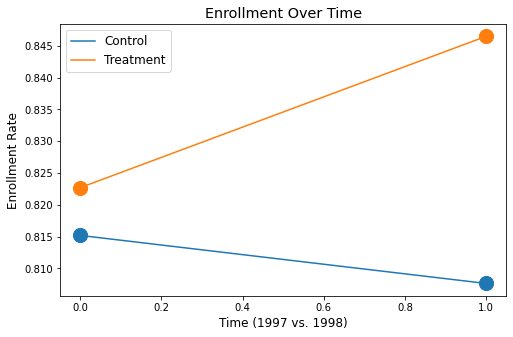

In [13]:
# calculating the treatment averages
treat_97 = data[(data['progresa']==1) & (data['poor']==1) & (data['year']==97)]['sc'].mean()
treat_98 = data[(data['progresa']==1) & (data['poor']==1) & (data['year']==98)]['sc'].mean()

# calculating the control averages
control_97 = data[(data['progresa']==0) & (data['poor']==1) & (data['year']==97)]['sc'].mean()
control_98 = data[(data['progresa']==0) & (data['poor']==1) & (data['year']==98)]['sc'].mean()

#creating a table
table = pandas.DataFrame({'1997' : [control_97, treat_97], '1998' : [control_98, treat_98]}, index = {'Treatment', 'Control'})
print(table)

# DiD plot
fig = plt.figure(figsize=(8, 5))
plt.scatter([0, 1], [control_97, control_98], s=200)
plt.plot([0, 1], [control_97, control_98], label='Control')
plt.scatter([0, 1], [treat_97, treat_98], s=200)
plt.plot([0, 1], [treat_97, treat_98], label='Treatment')
plt.legend(loc='best', fontsize='large')
plt.xlabel('Time (1997 vs. 1998)', fontsize='large')
plt.ylabel('Enrollment Rate', fontsize='large')
plt.title('Enrollment Over Time', fontsize='x-large')
plt.show()

**What is your difference-in-difference estimate of the impact, and how does it compare to your earlier (simple difference) results?**
Our difference-in-difference results are calculated as follows:
(.846479-.822697)-(.807637-.815186) = .031331

Our simple difference results were: .0388 for the ttest and the simple regression

We estimate that Progresa treatment will result in a 3.13% likelihood increse in enrollment rates for a child in a poor household, which is lower than our other simple estimates.

**What is the counterfactual assumption underlying this estimate?**
The counterfactual is that in the absence of treatment, the enrollment rate for the control group and the treatment groups would have changed by the same amount from 1997 to 1998

### 2.5 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment effects of the program in a difference-in-differences, for the poor households. Do this (i) first without including any control variables; and then (ii) do it a second time including at least 5 control variables. 

* What is your estimate (i) of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* Does your estimate of the impact of Progresa from (i) change when you add control variables as in (ii)? How do you explain these changes, or the lack of changes on the `progresa` coefficient between (i) and (ii)?
* How do the estimates from (i) and (ii) compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences, if any exist?
* What is the counterfactual assumption underlying regression (ii)? 

In [14]:
# (i)
data['year'].replace({98: 1, 97: 0}, inplace=True)
df9 = data[(data['poor']==1)]
df9['year*progresa'] = df9['year']*df9['progresa']


model1 = smf.ols(formula='sc ~ progresa + year + year*progresa', data=df9).fit()
print(model1.summary())

#(ii)
model2 = smf.ols(formula='sc ~ progresa + year + year*progresa + age + dist_sec + sex + hohedu + indig', data=df9).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     28.31
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           2.76e-18
Time:                        21:11:26   Log-Likelihood:                -26242.
No. Observations:               58372   AIC:                         5.249e+04
Df Residuals:                   58368   BIC:                         5.253e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.8152      0.003    233.182

<ipython-input-14-0d00aee9009e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9['year*progresa'] = df9['year']*df9['progresa']


**What is your estimate (i) of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.**

After treatment, the impact of Progresa is, on average, associated with 3.13 percentage point increase in enrollment rate among children living in poor households. The standard error for our coefficients are .003 and .006 for our intercept and for our interaction term respectively, which measures the variance of the coefficent across the observations. The coefficents are also statistically significant, as the p-values < 0.05.


**Does your estimate of the impact of Progresa from (i) change when you add control variables as in (ii)? How do you explain these changes, or the lack of changes on the progresa coefficient between (i) and (ii)?**

After treatment, the impact of Progresa is, holding all else constant, on average, associated with 3.14 percentage point increase in enrollment rate among children living in poor households, which is only a slight increase from the model without controls. This lack of change suggests that the control variables have little to no effect on the impact of progresa. The standard error for our coefficients are .006 and .006 for our intercept and for our interaction term respectively, which measures the variance of the coefficent across the observations. Our interaction term standard error did not change, indicating the same level of precision. The coefficents are also statistically significant, as the p-values < 0.05.


**How do the estimates from (i) and (ii) compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences, if any exist?**
In all models, the impact is about a 3.13 percentage point increase in enrollment rate.

**What is the counterfactual assumption underlying regression (ii)?**
The counterfactual is that in the absence of treatment, for households with the same values for the control variables, the enrollment rate for the control group and the treatment groups would have changed by the same amount from 1997 to 1998

### 2.6 Spillover effects

Thus far, we have focused on the impact of PROGRESA on the school enrollment of poor households. Repeat your analysis in 2.5, instead focusing on (a) the impact of PROGRESA on the school enrollment of non-poor households, and (b) the impact ofo PROGRESA on *other outcomes* of poor households that might plausibly have been affected by the PROGRESA program.
* Do you observe any impacts of PROGRESA on the school enrollment of the non-poor?
* Regardless of whether you find evidence of spillovers to non-poor, describe one or two reasons why PROGRESA *might* have impacted non-poor households. Give concrete examples based on the context in which PROGRESA was implemented.
* Do you observe any impacts of PROGRESA on other aspects of the welfare of poor households? 

In [15]:
# (a)
df10 = data[(data['poor']==0)]
df10['year*progresa'] = df10['year']*df10['progresa']

# (a)(i)
modela1 = smf.ols(formula='sc ~ progresa + year + year*progresa', data=df10).fit()
print(modela1.summary())

# (a)(ii)
modela2 = smf.ols(formula='sc ~ progresa + year + year*progresa + age + dist_sec + sex + hohedu+ indig', data=df10).fit()
print(modela2.summary())



# (b)
# (b)(i)
modelb1 = smf.ols(formula='hohwag ~ year + progresa + year*progresa', data=df9).fit()
print(modelb1.summary())

# (b)(ii)
modelb2 = smf.ols(formula='hohwag ~ year + progresa + year*progresa + age + sex + dist_sec + hohedu + indig', data=df9).fit()
print(modelb2.summary())




                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.332
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           0.000276
Time:                        21:11:26   Log-Likelihood:                -5448.5
No. Observations:               10425   AIC:                         1.090e+04
Df Residuals:                   10421   BIC:                         1.093e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.7626      0.009     89.682

<ipython-input-15-dabf118874bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10['year*progresa'] = df10['year']*df10['progresa']


**Do you observe any impacts of PROGRESA on the school enrollment of the non-poor?**
In both a(i) and a(ii), the interaction term of year\*progresa has a p-value greater than .05, so we cannot reject the null that the means are equal between 1997 and 1998, which implies that there is no impact of progresa on the school enrollment of the non-poor households.

**Regardless of whether you find evidence of spillovers to non-poor, describe one or two reasons why PROGRESA might have impacted non-poor households. Give concrete examples based on the context in which PROGRESA was implemented.**
Given that Progresa was a program in which households needed to be under a certain welfare index to qualify, it seems that the program could have impacted the wages of the non-poor households. For example, households that just missed the qualification cutoff could have slightly adjusted their income to reach the qualification cutoff for the next year.


**Do you observe any impacts of PROGRESA on other aspects of the welfare of poor households?**
I ran a regression to determine the impact of Progresa on hohwag (head of household wages) in poor households. The interaction term had a p-value greater than .05, so we cannot reject the null that the means are equal between 1997 and 1998, which implies that there is no impact of progresa on head of household wages of poor households.

### 2.7 Summary

* Based on all the analysis you have undertaken to date, do you believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico? 
* Using several different empirical frameworks, we have explored the impact of the PROGRESA program on enrollment rates of poor households in Mexico. In general, it appears that PROGRESA did have positive impact on the school enrollment rates, though the exact estimate depends on the method used to measure impact. After controlling for other observable characteristics, the most reliable difference-in-difference estimator estimates that PROGRESA raised enrollment rates by roughly 3.13 percentage points. A separate estimator, that includes externalities on non-poor households, produces a more conservative, and statistically insignificant, estimate.

*Discuss your results here*